/var/folders/q_/3dw4jg3d1zg1vtq9c1d082h00000gn/T/ipykernel_12266/1277350294.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Nationality_Group'] = filtered_df['Manager Country'].apply(map_nationality)
/var/folders/q_/3dw4jg3d1zg1vtq9c1d082h00000gn/T/ipykernel_12266/1277350294.py:116: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_array = np.array(pivot_with_gap.applymap(annot_fmt))


Added logo for Premier League
Added logo for Ligue 1
Added logo for La Liga
Added logo for Bundesliga
Added logo for Serie A
Added logo for Eredivisie
Added logo for Liga Portugal
Added flag for English
Added flag for French
Added flag for Spanish
Added flag for German
Added flag for Italian
Added flag for Dutch
Added flag for Portuguese

Analysis Complete: The frequency matrix showing percentages of manager nationalities across leagues
has been saved as 'frequency_matrix.png' and 'frequency_matrix.csv'


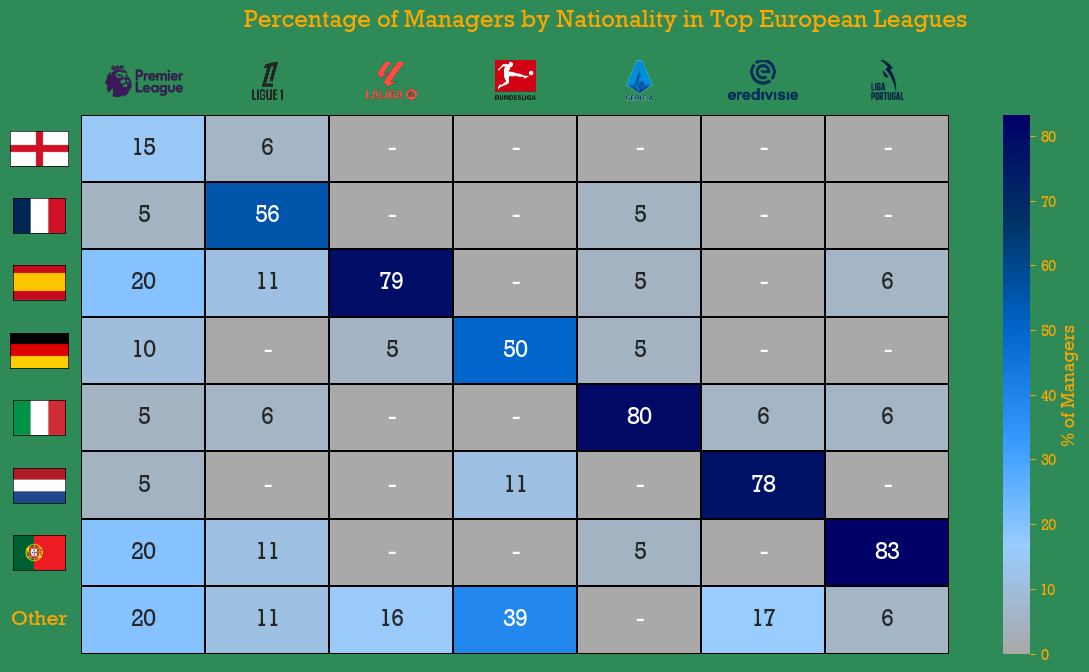

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import os

# Read the CSV file
df = pd.read_csv('/Users/julianball/Downloads/coaches.csv')

# Filter for the leagues of interest - expanded to include Eredivisie and Liga Portugal
leagues_of_interest = ['Premier League', 'Ligue 1', 'La Liga', 'Bundesliga', 'Serie A', 'Eredivisie', 'Liga Portugal']
filtered_df = df[df['League'].isin(leagues_of_interest)]

# Map nationalities to the desired categories
def map_nationality(nationality):
    if nationality == 'English':
        return 'English'
    elif nationality == 'French':
        return 'French'
    elif nationality == 'Spanish':
        return 'Spanish'
    elif nationality == 'German':
        return 'German'
    elif nationality == 'Italian':
        return 'Italian'
    elif nationality == 'Portuguese':
        return 'Portuguese'
    elif nationality == 'Dutch':
        return 'Dutch'
    else:
        return 'Other'

filtered_df['Nationality_Group'] = filtered_df['Manager Country'].apply(map_nationality)

# Create a pivot table for the frequency matrix
# Count the number of managers in each nationality group for each league
pivot_count = pd.pivot_table(filtered_df, 
                           index='Nationality_Group', 
                           columns='League', 
                           aggfunc='size',
                           fill_value=0)

# Calculate the total managers in each league
league_totals = pivot_count.sum(axis=0)

# Calculate percentages
pivot_percent = pivot_count / league_totals * 100

# Reorder the columns to match the specified order
desired_order = ['Premier League', 'Ligue 1', 'La Liga', 'Bundesliga', 'Serie A', 'Eredivisie', 'Liga Portugal']
pivot_percent = pivot_percent[desired_order]

# Ensure all desired nationality groups are present (even if zero)
for nationality in ['English', 'French', 'Spanish', 'German', 'Italian', 'Dutch', 'Portuguese', 'Other']:
    if nationality not in pivot_percent.index:
        pivot_percent.loc[nationality] = [0] * len(pivot_percent.columns)

# Reorder indices to have the specified order, including Portuguese and Dutch
pivot_percent = pivot_percent.reindex(['English', 'French', 'Spanish', 'German', 'Italian', 'Dutch', 'Portuguese', 'Other'])

# League and country logo paths
league_logos = {
    'Premier League': '/Users/julianball/Downloads/premierleague.png',
    'Ligue 1': '/Users/julianball/Downloads/ligue1.png',
    'La Liga': '/Users/julianball/Downloads/laliga.png',
    'Bundesliga': '/Users/julianball/Downloads/bundesliga.png',
    'Serie A': '/Users/julianball/Downloads/seriea.png',
    'Eredivisie': '/Users/julianball/Downloads/eredivisie.png',
    'Liga Portugal': '/Users/julianball/Downloads/ligaportugal.png'
}

country_flags = {
    'English': '/Users/julianball/Downloads/england.png',
    'French': '/Users/julianball/Downloads/france.png',
    'Spanish': '/Users/julianball/Downloads/spain.png',
    'German': '/Users/julianball/Downloads/germany.webp',  # Using WebP instead of PNG
    'Italian': '/Users/julianball/Downloads/italy.png',
    'Portuguese': '/Users/julianball/Downloads/portugal.png',
    'Dutch': '/Users/julianball/Downloads/netherlands.png',
    'Other': None     # No flag for Other
}

# Create a figure with adjusted sizing and lighter green background
fig = plt.figure(figsize=(14, 7))
fig.patch.set_facecolor('#2e8b57')  # Sea green background color (lighter than before)

# Create a single subplot for the heatmap
ax_main = plt.subplot(111)

# Create a new dataframe with a small gap between 'Other' and the rest
other_row = pivot_percent.loc[['Other']]
main_rows = pivot_percent.drop('Other')

# Create blank rows for small gaps
blank_row1 = pd.DataFrame(np.nan, index=['gap1'], columns=pivot_percent.columns)

# Get rows for different nationality groups
italy_row = pivot_percent.loc[['Italian']]
portugal_row = pivot_percent.loc[['Portuguese']]
dutch_row = pivot_percent.loc[['Dutch']]
other_row = pivot_percent.loc[['Other']]
main_rows = pivot_percent.drop(['Italian', 'Portuguese', 'Dutch', 'Other'])

# Concatenate with gaps between Italian, Portuguese, Dutch, and Other
pivot_with_gap = pd.concat([main_rows, italy_row, dutch_row, portugal_row, other_row])

# Create custom y-tick labels - only show nationality labels for Portuguese, Dutch, and Other
custom_yticks = ['' if label not in [ 'Other'] else label for label in pivot_with_gap.index]

# Create a custom annotation function to replace 0 with '-'
def annot_fmt(val):
    return '-' if val == 0 else f'{val:.0f}'

# Create a custom annotation array
annot_array = np.array(pivot_with_gap.applymap(annot_fmt))

# Create a custom color map with gray for zeros
from matplotlib.colors import LinearSegmentedColormap

# Create a custom grey to dark red colormap
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

# Define a colormap that goes from grey to dark blue
grey_to_blue = LinearSegmentedColormap.from_list('grey_to_blue', ['#A9A9A9', '#99CCFF', '#3399FF', '#0066CC', '#003366', '#000066'])

# Create the final colormap with grey for zeros (when masked)
cmap = ListedColormap(['#A9A9A9'] + [grey_to_blue(i) for i in range(1, grey_to_blue.N)])  # Grey for zeros, then grey-to-blue gradient

# Set background color for the axes
ax_main.set_facecolor('#2e8b57')  # Match with the figure background color

# Make a mask for NaN values (the gap rows)
mask = np.isnan(pivot_with_gap)

# Create heatmap with the gap and updated styling
sns.heatmap(pivot_with_gap, annot=annot_array, cmap=cmap, fmt="", 
           cbar_kws={'label': '% of Managers'}, 
           xticklabels=False,
           yticklabels=custom_yticks,
           linewidths=0.07,  # Extremely thin cell borders
           linecolor='black',  # Black outline color
           ax=ax_main,
           mask=mask,  # This will make NaN values transparent
           annot_kws={"fontsize": 16, "fontweight": "bold", "family": "Rockwell"})

# Update the colorbar styling
cbar = ax_main.collections[0].colorbar
cbar.set_label('% of Managers', fontsize=12, fontweight='bold', color='#ffa600', family='Rockwell')
cbar.ax.tick_params(labelcolor='#ffa600', color='#ffa600')
cbar.outline.set_edgecolor('#ffa600')

# Style the colorbar tick labels
for text in cbar.ax.get_yticklabels():
    text.set_color('#ffa600')
    text.set_fontweight('bold')
    text.set_family('Rockwell')

# Style the y-axis ticks
ax_main.tick_params(axis='y', length=0, colors='#ffa600')
for label in ax_main.get_yticklabels():
    label.set_color('#ffa600')
    label.set_fontweight('bold')
    label.set_fontsize(10)
    label.set_family('Rockwell')

# Fix the rotation and styling of the visible labels
for label in ax_main.get_yticklabels():
    # Make labels horizontal
    label.set_rotation(0)
    # Style the labels
    label.set_color('#ffa600')
    label.set_fontweight('bold')
    label.set_fontsize(14)
    label.set_family('Rockwell')

# Move x-axis to the top
ax_main.xaxis.tick_top()
ax_main.xaxis.set_label_position('top')
# Explicitly clear the x-axis label
ax_main.set_xlabel('')

# Get the position of the axes for accurate logo placement
fig.canvas.draw()  # This updates the figure dimensions

# Add league logos directly on top of the matrix, aligned with columns
for i, league in enumerate(pivot_percent.columns):
    logo_path = league_logos.get(league)
    if logo_path and os.path.exists(logo_path):
        try:
            # Check if file exists, if not, create a placeholder text logo
            if os.path.exists(logo_path):
                logo_img = mpimg.imread(logo_path)
                use_image = True
            else:
                print(f"Warning: Logo file not found for {league} at {logo_path}")
                print(f"Creating text placeholder instead")
                use_image = False
            
            # Adjust size for better visibility - make Serie A and Bundesliga slightly bigger
            if league == 'Serie A':
                logo_width = 0.075  # Bigger for Serie A
                logo_height = 0.075
            elif league == 'Bundesliga':
                logo_width = 0.06  # Slightly bigger for Bundesliga
                logo_height = 0.058
            elif league in ['Eredivisie', 'Liga Portugal']:
                logo_width = 0.06  # Slightly bigger for new leagues
                logo_height = 0.058
            else:
                logo_width = 0.055
                logo_height = 0.055
            
            # Calculate position - center on column and place right at the top
            x_center = ax_main.get_position().x0 + (i + 0.5) * ax_main.get_position().width / len(pivot_percent.columns)
            x_pos = x_center - (logo_width/2)  # Center the logo
            
            # Position logos with more space below the title
            if league == 'Serie A':
                y_pos = ax_main.get_position().y1 + 0.01  # Serie A logo, further from title
            else:
                y_pos = ax_main.get_position().y1 + 0.02  # Other logos, further from title
            
            logo_ax = fig.add_axes([x_pos, y_pos, logo_width, logo_height])
            
            if use_image:
                logo_ax.imshow(logo_img)
                logo_ax.axis('off')  # Hide all axes elements
            else:
                # Create text placeholder
                logo_ax.text(0.5, 0.5, league, ha='center', va='center', fontsize=8, fontweight='bold')
                logo_ax.set_xlim(0, 1)
                logo_ax.set_ylim(0, 1)
                logo_ax.axis('off')  # Hide all axes elements
            print(f"Added logo for {league}")
        except Exception as e:
            print(f"Error with logo for {league}: {e}")

# Add country flags next to nationality labels on the y-axis
# Get the y-axis tick positions
y_tick_positions = ax_main.get_yticks()

# Add flags next to each corresponding nationality label
for idx, nationality in enumerate(pivot_with_gap.index):
    # Skip gap rows and Other
    if nationality.startswith('gap') or nationality == 'Other':
        continue
        
    flag_path = country_flags.get(nationality)
    if flag_path and os.path.exists(flag_path):
        try:
            # Check if file exists, if not, create a placeholder text flag
            if os.path.exists(flag_path):
                flag_img = mpimg.imread(flag_path)
                use_image = True
            else:
                print(f"Warning: Flag file not found for {nationality} at {flag_path}")
                print(f"Creating text placeholder instead")
                use_image = False
            
            # Flag size and position
            flag_width = 0.05
            flag_height = 0.05
            
            # Calculate the y position based on the tick positions
            # Add a small offset (0.005) to move flags down slightly for better vertical centering
            y_pos = ax_main.get_position().y1 - ((idx + 0.5) * ax_main.get_position().height / len(pivot_with_gap)) - 0.025
            x_pos = ax_main.get_position().x0 - 0.055  # Closer to the y-axis
            
            flag_ax = fig.add_axes([x_pos, y_pos, flag_width, flag_height])
            
            if use_image:
                # Get the plot box's dimensions for adding a border
                flag_ax.imshow(flag_img)
                # Add a thin black border around the flag image
                for spine in flag_ax.spines.values():
                    spine.set_visible(True)
                    spine.set_color('black')  # Black border color
                    spine.set_linewidth(0.5)  # Thinner border width
                flag_ax.set_xticks([])
                flag_ax.set_yticks([])  # Remove ticks but keep border
            else:
                # Create text placeholder for flag
                flag_ax.text(0.5, 0.5, nationality[0], ha='center', va='center', fontsize=8, fontweight='bold')
                flag_ax.set_xlim(0, 1)
                flag_ax.set_ylim(0, 1)
                flag_ax.patch.set_alpha(0.2)  # Semi-transparent background
                # Add a thin black border around the text placeholder
                for spine in flag_ax.spines.values():
                    spine.set_visible(True)
                    spine.set_color('black')  # Black border color
                    spine.set_linewidth(0.5)  # Thinner border width
                flag_ax.set_xticks([])
                flag_ax.set_yticks([])  # Remove ticks but keep border
            print(f"Added flag for {nationality}")
        except Exception as e:
            print(f"Error with flag for {nationality}: {e}")

# Set main title for the figure with new styling - positioned even higher
fig.suptitle('Percentage of Managers by Nationality in Top European Leagues', 
             fontsize=16, y=1.03, fontweight='bold', color='#ffa600', family='Rockwell')

# Completely remove axis titles and labels
ax_main.set_ylabel('')  # Explicitly set to empty string
ax_main.set_xlabel('')  # Explicitly set to empty string
# Set the y-tick labels with custom positioning (shifted left)
ax_main.set_yticklabels(custom_yticks, ha='right')  # Align text to the right, which shifts them left
ax_main.tick_params(axis='y', pad=10)  # Adjust the padding for a better shift

ax_main.yaxis.label.set_visible(False)  # Hide y-axis label completely

# Save the plot - don't use tight_layout as it will mess up our custom layout
plt.savefig('/Users/julianball/CascadeProjects/coaches_analysis/frequency_matrix.png', dpi=300, bbox_inches='tight')

# Also output the data as a CSV
pivot_percent.to_csv('/Users/julianball/CascadeProjects/coaches_analysis/frequency_matrix.csv')

# Remove the date annotation at the bottom of the figure
# (Removed as requested)

# Save the figure with a tight layout to avoid cutoffs
plt.savefig('/Users/julianball/CascadeProjects/coaches_analysis/frequency_matrix.png', dpi=300, bbox_inches='tight')

# Save the data to CSV for reference
pivot_percent.to_csv('/Users/julianball/CascadeProjects/coaches_analysis/frequency_matrix.csv')

print("\nAnalysis Complete: The frequency matrix showing percentages of manager nationalities across leagues")
print("has been saved as 'frequency_matrix.png' and 'frequency_matrix.csv'")
# Date notation reference removed since it's no longer in the visualization


In [9]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

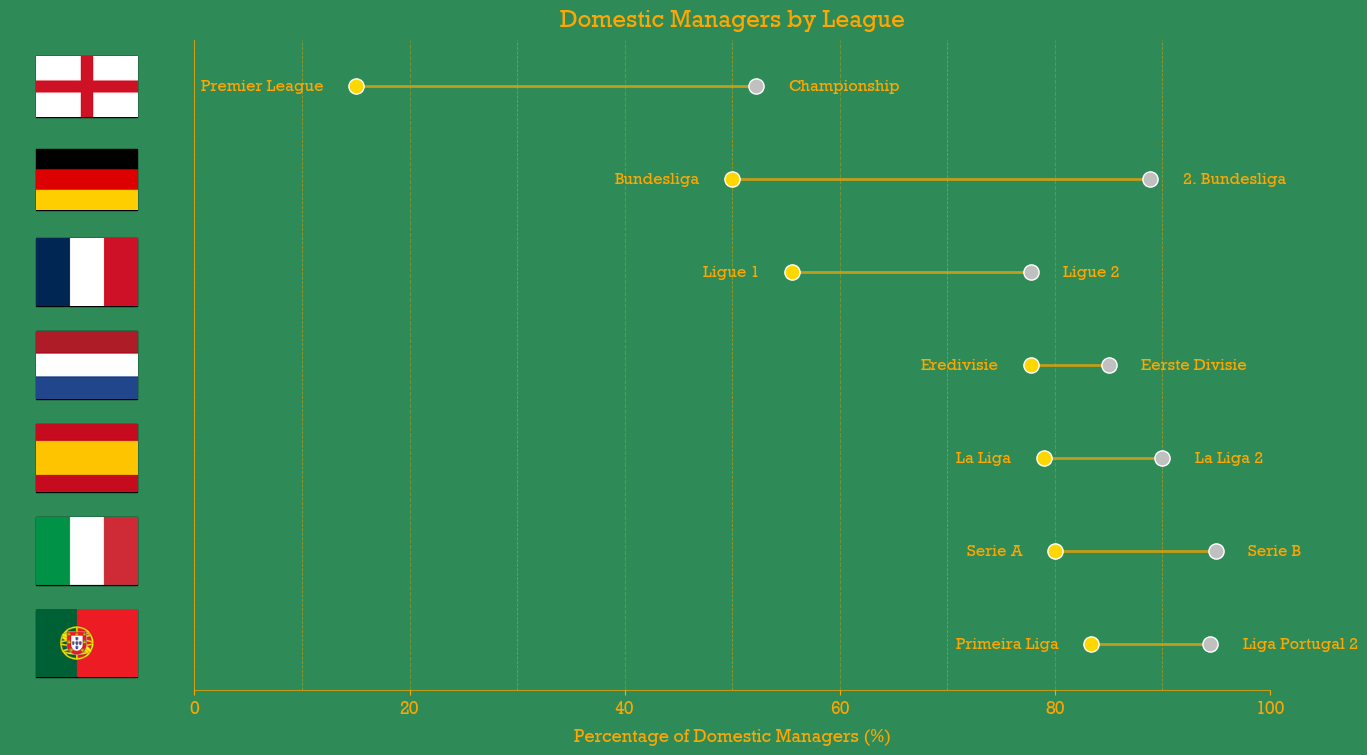

In [10]:
# Create a mapping of nationality adjectives to country names
country_mapping = {
    'English': 'England',
    'Scottish': 'Scotland',
    'Welsh': 'Wales',
    'German': 'Germany',
    'Italian': 'Italy',
    'Spanish': 'Spain',
    'French': 'France',
    'Portuguese': 'Portugal',
    'Dutch': 'Netherlands'
}

# Create a new column that indicates if the manager is local
df['Manager_Country_Normalized'] = df['Manager Country'].map(country_mapping).fillna(df['Manager Country'])
df['Is_Local'] = df['Manager_Country_Normalized'] == df['League Country']

# Group by League Country and Division, calculate percentage of local managers
grouped = df.groupby(['League Country', 'Division'])['Is_Local'].mean().reset_index()
grouped['Percentage'] = grouped['Is_Local'] * 100

# Filter to only include countries with both Division 1 and Division 2 data
countries_with_both = grouped.groupby('League Country').filter(lambda x: len(x) >= 2)['League Country'].unique()
filtered_data = grouped[grouped['League Country'].isin(countries_with_both)]

# Split the data by division
div1_data = filtered_data[filtered_data['Division'] == 1]
div2_data = filtered_data[filtered_data['Division'] == 2]

# Define the specific order for countries
custom_order = ['Portugal', 'Italy', 'Spain', 'Netherlands', 'France', 'Germany', 'England']

# Filter and reorder data based on custom order
div1_data = div1_data[div1_data['League Country'].isin(custom_order)].copy()
div2_data = div2_data[div2_data['League Country'].isin(custom_order)].copy()

# Create a mapping for sorting
order_mapping = {country: i for i, country in enumerate(custom_order)}

# Sort data according to custom order
div1_data['order'] = div1_data['League Country'].map(order_mapping)
div2_data['order'] = div2_data['League Country'].map(order_mapping)
div1_data = div1_data.sort_values('order')
div2_data = div2_data.sort_values('order')

# Get the ordered country list
countries = custom_order

# Define paths to country flags
country_flags = {
    'England': '/Users/julianball/Downloads/england.png',
    'Germany': '/Users/julianball/Downloads/germany.webp',  # Using webp file
    'Netherlands': '/Users/julianball/Downloads/netherlands.png',
    'Spain': '/Users/julianball/Downloads/spain.png',
    'Italy': '/Users/julianball/Downloads/italy.png',
    'France': '/Users/julianball/Downloads/france.png',
    'Portugal': '/Users/julianball/Downloads/portugal.png'
}

# Define mapping of countries to league names for both divisions
league_names = {
    'England': {
        1: 'Premier League',
        2: 'Championship'
    },
    'Spain': {
        1: 'La Liga',
        2: 'La Liga 2'
    },
    'Italy': {
        1: 'Serie A',
        2: 'Serie B'
    },
    'Germany': {
        1: 'Bundesliga',
        2: '2. Bundesliga'
    },
    'France': {
        1: 'Ligue 1',
        2: 'Ligue 2'
    },
    'Netherlands': {
        1: 'Eredivisie',
        2: 'Eerste Divisie'
    },
    'Portugal': {
        1: 'Primeira Liga',
        2: 'Liga Portugal 2'
    }
}

# Define colors for the dots
div1_color = '#FFD700'  # Gold for Division 1
div2_color = '#C0C0C0'  # Silver for Division 2


# Helper function to load images while preserving aspect ratio and transparency
def get_normalized_image(path, max_size=60):
    if not os.path.exists(path):
        print(f"File not found: {path}")
        return None
    
    try:
        # Open the image with PIL - works for PNG, JPEG, WEBP and SVG
        img = Image.open(path)
        
        # Preserve transparency
        if img.mode == 'RGBA':
            pass  # Keep the alpha channel
        elif img.mode == 'P' and 'transparency' in img.info:
            # Convert palette image with transparency to RGBA
            img = img.convert('RGBA')
        else:
            # If image doesn't have transparency, convert to RGB
            img = img.convert('RGB')
            
        # Calculate new dimensions while preserving aspect ratio
        width, height = img.size
        if width > height:
            new_width = max_size
            new_height = int(height * (max_size / width))
        else:
            new_height = max_size
            new_width = int(width * (max_size / height))
        
        # Resize while maintaining aspect ratio
        img = img.resize((new_width, new_height), Image.LANCZOS)
        
        # Convert PIL Image to numpy array for matplotlib
        return np.array(img)
    except Exception as e:
        print(f"Error processing image {path}: {e}")
        return None

# Function to add flag image to a specific position with normalized size
def add_flag_to_axis(country, y_position, label_ax, zoom=0.608):  # 5% smaller than previous setting (0.64)
    flag_path = country_flags.get(country)
    
    if flag_path and os.path.exists(flag_path):
        # Get flag image with preserved aspect ratio and transparency
        flag_img = get_normalized_image(flag_path, max_size=120)  # Maintain same base size
        
        if flag_img is not None:
            imagebox = OffsetImage(flag_img, zoom=zoom)
            # Centralize flag in the available space
            ab = AnnotationBbox(
                imagebox,
                (0.5, y_position),  # Center horizontally in the label axis
                xycoords=('axes fraction', 'data'),
                box_alignment=(0.5, 0.5),
                pad=0,
                frameon=True,  # Enable frame
                bboxprops=dict(edgecolor='black', linewidth=1, facecolor='none')  # Faint black outline
            )
            label_ax.add_artist(ab)
            return True
    
    return False

# Create figure with better aspect ratio and better space distribution
fig = plt.figure(figsize=(14, 8))

# Create two subplots with more balanced width ratios
gs = fig.add_gridspec(1, 2, width_ratios=[0.5, 3.5])

# Create label axis on the left (for country names and flags)
label_ax = fig.add_subplot(gs[0])

# Create main chart axis on the right
ax = fig.add_subplot(gs[1])

# Set styling
fig.patch.set_facecolor('#2e8b57')  # Sea green background
ax.set_facecolor('#2e8b57')  # Match the background

# Create y positions for countries
y_positions = np.arange(len(countries))

# Plot the connecting lines and logos for each country
for i, country in enumerate(y_positions):
    div1_pct = div1_data.iloc[i]['Percentage']
    div2_pct = div2_data.iloc[i]['Percentage']
    country_name = countries[i]
    
    # Plot the horizontal line connecting the dots
    ax.plot([div1_pct, div2_pct], [i, i], color='#ffa600', linestyle='-', linewidth=2, alpha=0.7)
    
    # Add dots for each division
    ax.scatter(div1_pct, i, s=120, color=div1_color, zorder=5, edgecolor='white', linewidth=1)
    ax.scatter(div2_pct, i, s=120, color=div2_color, zorder=5, edgecolor='white', linewidth=1)
    
    # Add league names next to dots with larger font
    # Division 1 league name to left of dot
    div1_league = league_names.get(country_name, {}).get(1, 'Div 1')
    ax.text(div1_pct - 3, i, f"{div1_league}", va='center', ha='right', color='#ffa600', 
            fontweight='bold', fontsize=11, family='Rockwell')
    # Division 2 league name to right of dot
    div2_league = league_names.get(country_name, {}).get(2, 'Div 2')
    ax.text(div2_pct + 3, i, f"{div2_league}", va='center', color='#ffa600', 
            fontweight='bold', fontsize=11, family='Rockwell')

# Add only flags to the label axis (no country text labels)
for i, country in enumerate(countries):
    # Add flags
    add_flag_to_axis(country, i, label_ax)

# Style the plot with updated titles and larger font
ax.set_title('Domestic Managers by League', 
            fontsize=16, fontweight='bold', color='#ffa600', family='Rockwell', pad=10)
ax.set_xlabel('Percentage of Domestic Managers (%)', 
            fontsize=12, color='#ffa600', fontweight='bold', family='Rockwell', labelpad=8)

# Set chart axis limits
ax.set_ylim(-0.5, len(countries) - 0.5)
ax.set_xlim(0, 100)  # X-axis from 0% to 100%

# Remove y-axis ticks from main chart
ax.set_yticks([])
ax.set_yticklabels([])

# Style the y-axis line
ax.spines['left'].set_color('#ffa600')
ax.spines['left'].set_linewidth(1)

# Set up the label axis
label_ax.set_ylim(-0.5, len(countries) - 0.5)  # Match the main chart
label_ax.set_xlim(0, 1)
label_ax.axis('off')  # Hide all axes on the label side

# Style the x-axis ticks
ax.tick_params(axis='x', colors='#ffa600', labelsize=12)
for label in ax.get_xticklabels():
    label.set_fontfamily('Rockwell')
    label.set_fontweight('bold')

# Add grid with thin lines
# Horizontal grid lines
ax.grid(True, axis='y', linestyle='--', linewidth=0.3, color='#ffa600', alpha=0.7, zorder=0)

# Add vertical grid lines at 10% intervals with more emphasis on key percentages
for x in range(0, 101, 10):
    if x in [0, 10, 30, 50, 70, 90]:  # Emphasized grid lines
        ax.axvline(x=x, color='#ffa600', linestyle='--', linewidth=0.6, alpha=0.5, zorder=0)
    else:  # Regular grid lines
        ax.axvline(x=x, color='#ffa600', linestyle='--', linewidth=0.8, alpha=0.3, zorder=0)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Style the left spine (y-axis)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('#ffa600')
ax.spines['left'].set_linewidth(0.5)

# Style remaining spines
ax.spines['bottom'].set_color('#ffa600')
ax.spines['bottom'].set_linewidth(0.5)

# No legend needed

# Ensure plot has good layout with centralized visualization
plt.tight_layout()
plt.subplots_adjust(wspace=0.05, top=0.9, left=0.05, right=0.95)  # Fine-tune spacing

# Show plot
plt.show()